In [46]:
import pandas as pd

# Load the core datasets
df_perf = pd.read_csv("202324_performance_tables_schools_final.csv")
df_info = pd.read_csv("202324_information_about_schools_final.csv")
df_inspect = pd.read_csv("Management_information_-_state-funded_schools_-_latest_inspections_-_as_at_31_Mar_2025.csv", encoding='ISO-8859-1')

# Preview shape and structure
print("Performance data shape:", df_perf.shape)
print("Info data shape:", df_info.shape)
print("Inspection data shape:", df_inspect.shape)

# Optional: preview top rows to ensure it loads properly
df_perf.head(2), df_info.head(2), df_inspect.head(2)


Performance data shape: (57090, 157)
Info data shape: (5709, 60)
Inspection data shape: (22008, 74)


/var/folders/td/4000g55n69dgnf646nfzz8hm0000gn/T/ipykernel_15354/1966368926.py:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inspect = pd.read_csv("Management_information_-_state-funded_schools_-_latest_inspections_-_as_at_31_Mar_2025.csv", encoding='ISO-8859-1')


(   time_period time_identifier geographic_level country_code country_name  \
 0       202324   Academic year           School    E92000001      England   
 1       202324   Academic year           School    E92000001      England   
 
    school_laestab  school_urn         school_name  old_la_code new_la_code  \
 0         2016000      100544  David Game College          201   E09000001   
 1         2016000      100544  David Game College          201   E09000001   
 
           la_name version establishment_type_group breakdown_topic breakdown  \
 0  City of London   Final      Independent schools           Total     Total   
 1  City of London   Final      Independent schools             Sex      Boys   
 
      sex disadvantage first_language prior_attainment mobility t_pupils  \
 0  Total        Total          Total            Total    Total       49   
 1   Boys        Total          Total            Total    Total       26   
 
   t_att8 avg_att8 t_entbasics pt_entbasics t_l2ba

In [47]:
# Check data types and nulls for a quick overview
print("\n--- Data Types and Nulls ---")
print("\nPerformance dataset:")
print(df_perf.info())
print("\nInfo dataset:")
print(df_info.info())
print("\nInspection dataset:")
print(df_inspect.info())


--- Data Types and Nulls ---

Performance dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57090 entries, 0 to 57089
Columns: 157 entries, time_period to pt_volume_covidimpacted_e
dtypes: int64(4), object(153)
memory usage: 68.4+ MB
None

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5709 entries, 0 to 5708
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   time_period               5709 non-null   int64 
 1   time_identifier           5709 non-null   object
 2   geographic_level          5709 non-null   object
 3   country_code              5709 non-null   object
 4   country_name              5709 non-null   object
 5   school_laestab            5709 non-null   int64 
 6   school_urn                5709 non-null   int64 
 7   school_name               5709 non-null   object
 8   old_la_code               5709 non-null   int64 
 9   new_la_code               5709

In [50]:
# See all columns and their data types
df_perf.dtypes


time_period                   int64
time_identifier              object
geographic_level             object
country_code                 object
country_name                 object
school_laestab                int64
school_urn                    int64
school_name                  object
old_la_code                   int64
new_la_code                  object
la_name                      object
version                      object
establishment_type_group     object
breakdown_topic              object
breakdown                    object
sex                          object
disadvantage                 object
first_language               object
prior_attainment             object
mobility                     object
t_pupils                     object
t_att8                       object
avg_att8                     object
t_entbasics                  object
pt_entbasics                 object
t_l2basics_95                object
pt_l2basics_95               object
t_l2basics_94               

In [52]:
# Get a quick summary of column types
df_perf.dtypes.value_counts()


object    153
int64       4
Name: count, dtype: int64

In [54]:
# List all column names
df_perf.columns.tolist()


['time_period',
 'time_identifier',
 'geographic_level',
 'country_code',
 'country_name',
 'school_laestab',
 'school_urn',
 'school_name',
 'old_la_code',
 'new_la_code',
 'la_name',
 'version',
 'establishment_type_group',
 'breakdown_topic',
 'breakdown',
 'sex',
 'disadvantage',
 'first_language',
 'prior_attainment',
 'mobility',
 't_pupils',
 't_att8',
 'avg_att8',
 't_entbasics',
 'pt_entbasics',
 't_l2basics_95',
 'pt_l2basics_95',
 't_l2basics_94',
 'pt_l2basics_94',
 't_ebacc_e_ptq_ee',
 'pt_ebacc_e_ptq_ee',
 't_ebacc_95',
 'pt_ebacc_95',
 't_ebacc_94',
 'pt_ebacc_94',
 't_ebaccaps',
 'avg_ebaccaps',
 't_inp8calc',
 't_p8score',
 'avg_p8score',
 'p8score_ci_low',
 'p8score_ci_upp',
 't_p8eng',
 'avg_p8eng',
 'p8eng_ci_low',
 'p8eng_ci_upp',
 't_p8mat',
 'avg_p8mat',
 'p8mat_ci_low',
 'p8mat_ci_upp',
 't_p8ebac',
 'avg_p8ebac',
 'p8ebac_ci_low',
 'p8ebac_ci_upp',
 't_p8open',
 'avg_p8open',
 'p8open_ci_low',
 'p8open_ci_upp',
 't_anypass',
 'pt_anypass',
 't_ebaceng_e',
 'pt_

In [56]:
# Check for duplicate URNs (key identifier)
print("Duplicate URNs in performance data:", df_perf['school_urn'].duplicated().sum())
print("Duplicate URNs in info data:", df_info['school_urn'].duplicated().sum())
print("Duplicate URNs in inspection data:", df_inspect['URN at time of latest graded inspection'].duplicated().sum())

# Check for missing URNs (essential for merging)
print("Missing URNs in performance data:", df_perf['school_urn'].isnull().sum())
print("Missing URNs in info data:", df_info['school_urn'].isnull().sum())
print("Missing URNs in inspection data:", df_inspect['URN at time of latest graded inspection'].isnull().sum())



Duplicate URNs in performance data: 51381
Duplicate URNs in info data: 0
Duplicate URNs in inspection data: 159
Missing URNs in performance data: 0
Missing URNs in info data: 0
Missing URNs in inspection data: 160


In [58]:
# Filter to rows with non-null URNs and Ofsted ratings
df_inspect = df_inspect[
    df_inspect['URN at time of latest graded inspection'].notnull() &
    df_inspect['Overall effectiveness'].notnull()
]


# Rename URN column to school_urn for consistency across datasets
df_inspect = df_inspect.rename(columns={
    'URN at time of latest graded inspection': 'school_urn',
    'Overall effectiveness': 'ofsted_rating'
})

# Ensure all URNs are of the same type (int)
df_inspect['school_urn'] = df_inspect['school_urn'].astype(int)
df_info['school_urn'] = df_info['school_urn'].astype(int)
df_perf['school_urn'] = df_perf['school_urn'].astype(int)


In [60]:
# Ensure only 1 row per school is selected (total)
df_perf_new = df_perf[
    (df_perf['breakdown'] == 'Total') &
    (df_perf['sex'] == 'Total') &
    (df_perf['disadvantage'] == 'Total') &
    (df_perf['first_language'] == 'Total') &
    (df_perf['prior_attainment'] == 'Total') &
    (df_perf['mobility'] == 'Total')
]

In [62]:
# Check for duplicate URNs (key identifier)
print("Duplicate URNs in performance data:", df_perf_new['school_urn'].duplicated().sum())
print("Duplicate URNs in info data:", df_info['school_urn'].duplicated().sum())
print("Duplicate URNs in inspection data:", df_inspect['school_urn'].duplicated().sum())

# Check for missing URNs (essential for merging)
print("Missing URNs in performance data:", df_perf_new['school_urn'].isnull().sum())
print("Missing URNs in info data:", df_info['school_urn'].isnull().sum())
print("Missing URNs in inspection data:", df_inspect['school_urn'].isnull().sum())

Duplicate URNs in performance data: 0
Duplicate URNs in info data: 0
Duplicate URNs in inspection data: 0
Missing URNs in performance data: 0
Missing URNs in info data: 0
Missing URNs in inspection data: 0


In [64]:
# Merge performance and info datasets
df_merged = df_perf_new.merge(df_info, on='school_urn', how='left')

# Merge with inspection data (target variable: ofsted_rating)
df_merged = df_merged.merge(df_inspect, on='school_urn', how='left')

# Keep only rows with Ofsted rating (target)
df_merged = df_merged[df_merged['ofsted_rating'].notnull()]

# Report the shape of the final dataset
print("Final merged dataset shape:", df_merged.shape)


Final merged dataset shape: (3816, 289)


In [66]:
print(df_merged.columns.tolist())

['time_period_x', 'time_identifier_x', 'geographic_level_x', 'country_code_x', 'country_name_x', 'school_laestab_x', 'school_urn', 'school_name_x', 'old_la_code_x', 'new_la_code_x', 'la_name_x', 'version_x', 'establishment_type_group_x', 'breakdown_topic', 'breakdown', 'sex', 'disadvantage', 'first_language', 'prior_attainment', 'mobility', 't_pupils_x', 't_att8', 'avg_att8', 't_entbasics', 'pt_entbasics', 't_l2basics_95', 'pt_l2basics_95', 't_l2basics_94', 'pt_l2basics_94', 't_ebacc_e_ptq_ee', 'pt_ebacc_e_ptq_ee', 't_ebacc_95', 'pt_ebacc_95', 't_ebacc_94', 'pt_ebacc_94', 't_ebaccaps', 'avg_ebaccaps', 't_inp8calc', 't_p8score', 'avg_p8score', 'p8score_ci_low', 'p8score_ci_upp', 't_p8eng', 'avg_p8eng', 'p8eng_ci_low', 'p8eng_ci_upp', 't_p8mat', 'avg_p8mat', 'p8mat_ci_low', 'p8mat_ci_upp', 't_p8ebac', 'avg_p8ebac', 'p8ebac_ci_low', 'p8ebac_ci_upp', 't_p8open', 'avg_p8open', 'p8open_ci_low', 'p8open_ci_upp', 't_anypass', 'pt_anypass', 't_ebaceng_e', 'pt_ebaceng_e', 't_ebacmat_e', 'pt_ebac

In [68]:
# Select key features manually based on domain logic + past performance
selected_columns = [
    # Target variable
    'ofsted_rating',

    # Key Progress 8 & Attainment 8 indicators
    'avg_p8score',
    'avg_att8',
    'avg_p8ebac',
    'avg_p8eng',
    'avg_p8mat',
    'avg_p8open',
    'avg_ebaccaps',         
    'diffn_att8',         
    'diffn_p8mea', 

    # EBacc and core subject entry proportions
    'pt_entbasics',
    'pt_ebacc_e_ptq_ee',
    'pt_ebaceng_e', 'pt_ebacmat_e', 'pt_ebac2sci_e', 'pt_ebachum_e', 'pt_ebaclan_e',
    'pt_ebaceng_95', 'pt_ebacmat_95', 'pt_ebac2sci_95', 'pt_ebachum_95', 'pt_ebaclan_95',
    'pt_ebacc_95','pt_5em_94',

    # Subject-level attainment 8 scores
'avg_att8_eng', 'avg_att8_mat', 'avg_att8_ebac', 'avg_att8_open',
'avg_att8_open_g', 'avg_att8_open_ng',
'avg_ebac_fill', 'avg_open_fill',
'avg_gcse_e', 'avg_volume_e',



    # Student characteristics and demographics
    'pt_disadvantaged',
    'pt_language_not_english',
    'pt_language_unknown',
    'pt_not_mobile',


    # SEN (Special Educational Needs)
    'pt_sen_with_ehcp',
    'pt_sen_no_ehcp',
    'pt_sen',

    # Prior attainment at KS2
    'pt_prior_lo',
    'pt_prior_av',
    'pt_prior_hi',
    'avg_ks2_scaledscore',
    # Contextual features

'Faith grouping', 'The income deprivation affecting children index (IDACI) quintile',
'School type at time of latest graded inspection',

    # Historical Ofsted data
    'Previous graded inspection overall effectiveness',
    'Previous quality of education',
    'Previous behaviour and attitudes',
    'Previous personal development',
    'Previous effectiveness of leadership and management',
    'Previous safeguarding is effective?',
   
]

# Create new filtered DataFrame
df_final = df_merged[selected_columns].copy()

# Preview the shape and columns
print("Shape of final dataset:", df_final.shape)
print("Columns included:\n", df_final.columns.tolist())


Shape of final dataset: (3816, 54)
Columns included:
 ['ofsted_rating', 'avg_p8score', 'avg_att8', 'avg_p8ebac', 'avg_p8eng', 'avg_p8mat', 'avg_p8open', 'avg_ebaccaps', 'diffn_att8', 'diffn_p8mea', 'pt_entbasics', 'pt_ebacc_e_ptq_ee', 'pt_ebaceng_e', 'pt_ebacmat_e', 'pt_ebac2sci_e', 'pt_ebachum_e', 'pt_ebaclan_e', 'pt_ebaceng_95', 'pt_ebacmat_95', 'pt_ebac2sci_95', 'pt_ebachum_95', 'pt_ebaclan_95', 'pt_ebacc_95', 'pt_5em_94', 'avg_att8_eng', 'avg_att8_mat', 'avg_att8_ebac', 'avg_att8_open', 'avg_att8_open_g', 'avg_att8_open_ng', 'avg_ebac_fill', 'avg_open_fill', 'avg_gcse_e', 'avg_volume_e', 'pt_disadvantaged', 'pt_language_not_english', 'pt_language_unknown', 'pt_not_mobile', 'pt_sen_with_ehcp', 'pt_sen_no_ehcp', 'pt_sen', 'pt_prior_lo', 'pt_prior_av', 'pt_prior_hi', 'avg_ks2_scaledscore', 'Faith grouping', 'The income deprivation affecting children index (IDACI) quintile', 'School type at time of latest graded inspection', 'Previous graded inspection overall effectiveness', 'Previous

In [70]:
# Total missing values per column
missing_counts = df_final.isnull().sum()
print("Missing values per column:")
print(missing_counts[missing_counts > 0])


Missing values per column:
Previous graded inspection overall effectiveness       221
Previous quality of education                          221
Previous behaviour and attitudes                       221
Previous personal development                          221
Previous effectiveness of leadership and management    221
Previous safeguarding is effective?                    221
dtype: int64


In [72]:
# Percentage of missing values per column
missing_percent = (df_final.isnull().sum() / len(df_final)) * 100
print("Percentage of missing values:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


Percentage of missing values:
Previous graded inspection overall effectiveness       5.791405
Previous quality of education                          5.791405
Previous behaviour and attitudes                       5.791405
Previous personal development                          5.791405
Previous effectiveness of leadership and management    5.791405
Previous safeguarding is effective?                    5.791405
dtype: float64


In [74]:
# Check data types
print(df_final.dtypes)

# Show columns that are not numeric (e.g., strings or mixed types)
non_numeric_columns = df_final.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:")
print(non_numeric_columns)


ofsted_rating                                                        object
avg_p8score                                                          object
avg_att8                                                             object
avg_p8ebac                                                           object
avg_p8eng                                                            object
avg_p8mat                                                            object
avg_p8open                                                           object
avg_ebaccaps                                                         object
diffn_att8                                                           object
diffn_p8mea                                                          object
pt_entbasics                                                         object
pt_ebacc_e_ptq_ee                                                    object
pt_ebaceng_e                                                         object
pt_ebacmat_e

In [76]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

for col in df_final.columns:
    print(f"\nColumn: {col} (dtype: {df_final[col].dtype})")
    print(df_final[col].value_counts(dropna=False).sort_index())




Column: ofsted_rating (dtype: object)
ofsted_rating
1              611
2             2409
3              370
4               61
Not judged     365
Name: count, dtype: int64

Column: avg_p8score (dtype: object)
avg_p8score
-0.01     20
-0.02     32
-0.03     20
-0.04     27
-0.05     23
-0.06     19
-0.07     26
-0.08     28
-0.09     20
-0.1      22
-0.11     16
-0.12     23
-0.13     40
-0.14     20
-0.15     18
-0.16     18
-0.17     30
-0.18     21
-0.19     26
-0.2      21
-0.21     24
-0.22     30
-0.23     21
-0.24     21
-0.25     17
-0.26     18
-0.27     25
-0.28     27
-0.29     28
-0.3      22
-0.31     18
-0.32     25
-0.33     16
-0.34     20
-0.35     18
-0.36     21
-0.37     20
-0.38     21
-0.39     20
-0.4      16
-0.41     20
-0.42     13
-0.43     16
-0.44     15
-0.45     12
-0.46     17
-0.47     18
-0.48     15
-0.49     12
-0.5      12
-0.51     14
-0.52     12
-0.53     14
-0.54     17
-0.55     16
-0.56     13
-0.57      9
-0.58     14
-0.59     12
-0.6      

In [79]:
for col in [
    'avg_p8score', 'avg_att8', 'avg_p8ebac', 'avg_p8eng', 'avg_p8mat', 'avg_p8open', 'avg_ebaccaps',
    'diffn_att8', 'diffn_p8mea',
    'pt_entbasics', 'pt_ebacc_e_ptq_ee',
    'pt_ebaceng_e', 'pt_ebacmat_e', 'pt_ebac2sci_e', 'pt_ebachum_e', 'pt_ebaclan_e',
    'pt_ebaceng_95', 'pt_ebacmat_95', 'pt_ebac2sci_95', 'pt_ebachum_95', 'pt_ebaclan_95',
    'pt_ebacc_95', 'pt_5em_94',
    'avg_att8_eng', 'avg_att8_mat', 'avg_att8_ebac', 'avg_att8_open',
    'avg_att8_open_g', 'avg_att8_open_ng',
    'avg_ebac_fill', 'avg_open_fill',
    'avg_gcse_e', 'avg_volume_e',
    'pt_disadvantaged', 'pt_language_not_english', 'pt_language_unknown',
    'pt_not_mobile', 'pt_sen_with_ehcp', 'pt_sen_no_ehcp', 'pt_sen',
    'pt_prior_lo', 'pt_prior_av', 'pt_prior_hi',
    'avg_ks2_scaledscore'
]:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')



In [81]:
df_final['Previous safeguarding is effective?'] = (
    df_final['Previous safeguarding is effective?']
    .replace('9', 'Unknown')
    .fillna('Unknown')
)


In [83]:
cols_to_clean = [
    'Previous quality of education',
    'Previous behaviour and attitudes',
    'Previous personal development'
]

for col in cols_to_clean:
    df_final[col] = df_final[col].replace(9.0, pd.NA)


In [85]:
for col in cols_to_clean:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')


In [87]:
# Remove 'Not judged' and convert remaining Ofsted ratings to integers
df_final = df_final[df_final['ofsted_rating'] != 'Not judged'].copy()
df_final['ofsted_rating'] = df_final['ofsted_rating'].astype(int)




In [89]:
# Show missing data
missing = df_final.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 avg_p8score                                             400
avg_att8                                                385
avg_p8ebac                                              400
avg_p8eng                                               400
avg_p8mat                                               400
avg_p8open                                              400
avg_ebaccaps                                            385
diffn_att8                                              563
diffn_p8mea                                             581
pt_entbasics                                            385
pt_ebacc_e_ptq_ee                                       385
pt_ebaceng_e                                            385
pt_ebacmat_e                                            385
pt_ebac2sci_e                                           385
pt_ebachum_e                                            385
pt_ebaclan_e                                            385
pt_ebaceng_9

In [91]:
from sklearn.impute import SimpleImputer

# Identify numeric columns
num_cols = df_final.select_dtypes(include='number').columns

# Create imputer
num_imputer = SimpleImputer(strategy='median')

# Fit and transform
df_final[num_cols] = num_imputer.fit_transform(df_final[num_cols])


In [92]:
print("Remaining missing values:\n", df_final.isna().sum()[df_final.isna().sum() > 0])


Remaining missing values:
 Series([], dtype: int64)


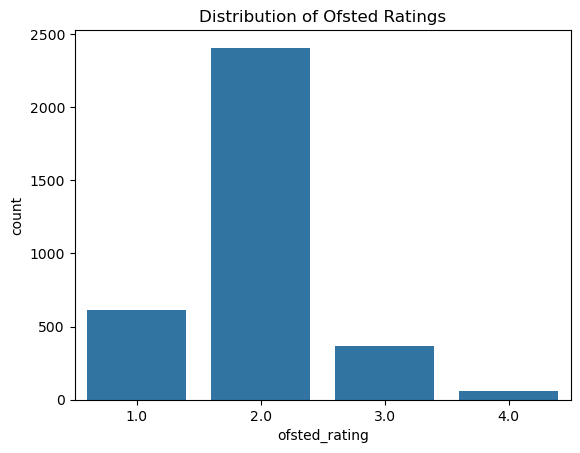

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='ofsted_rating', data=df_final)
plt.title("Distribution of Ofsted Ratings")
plt.show()


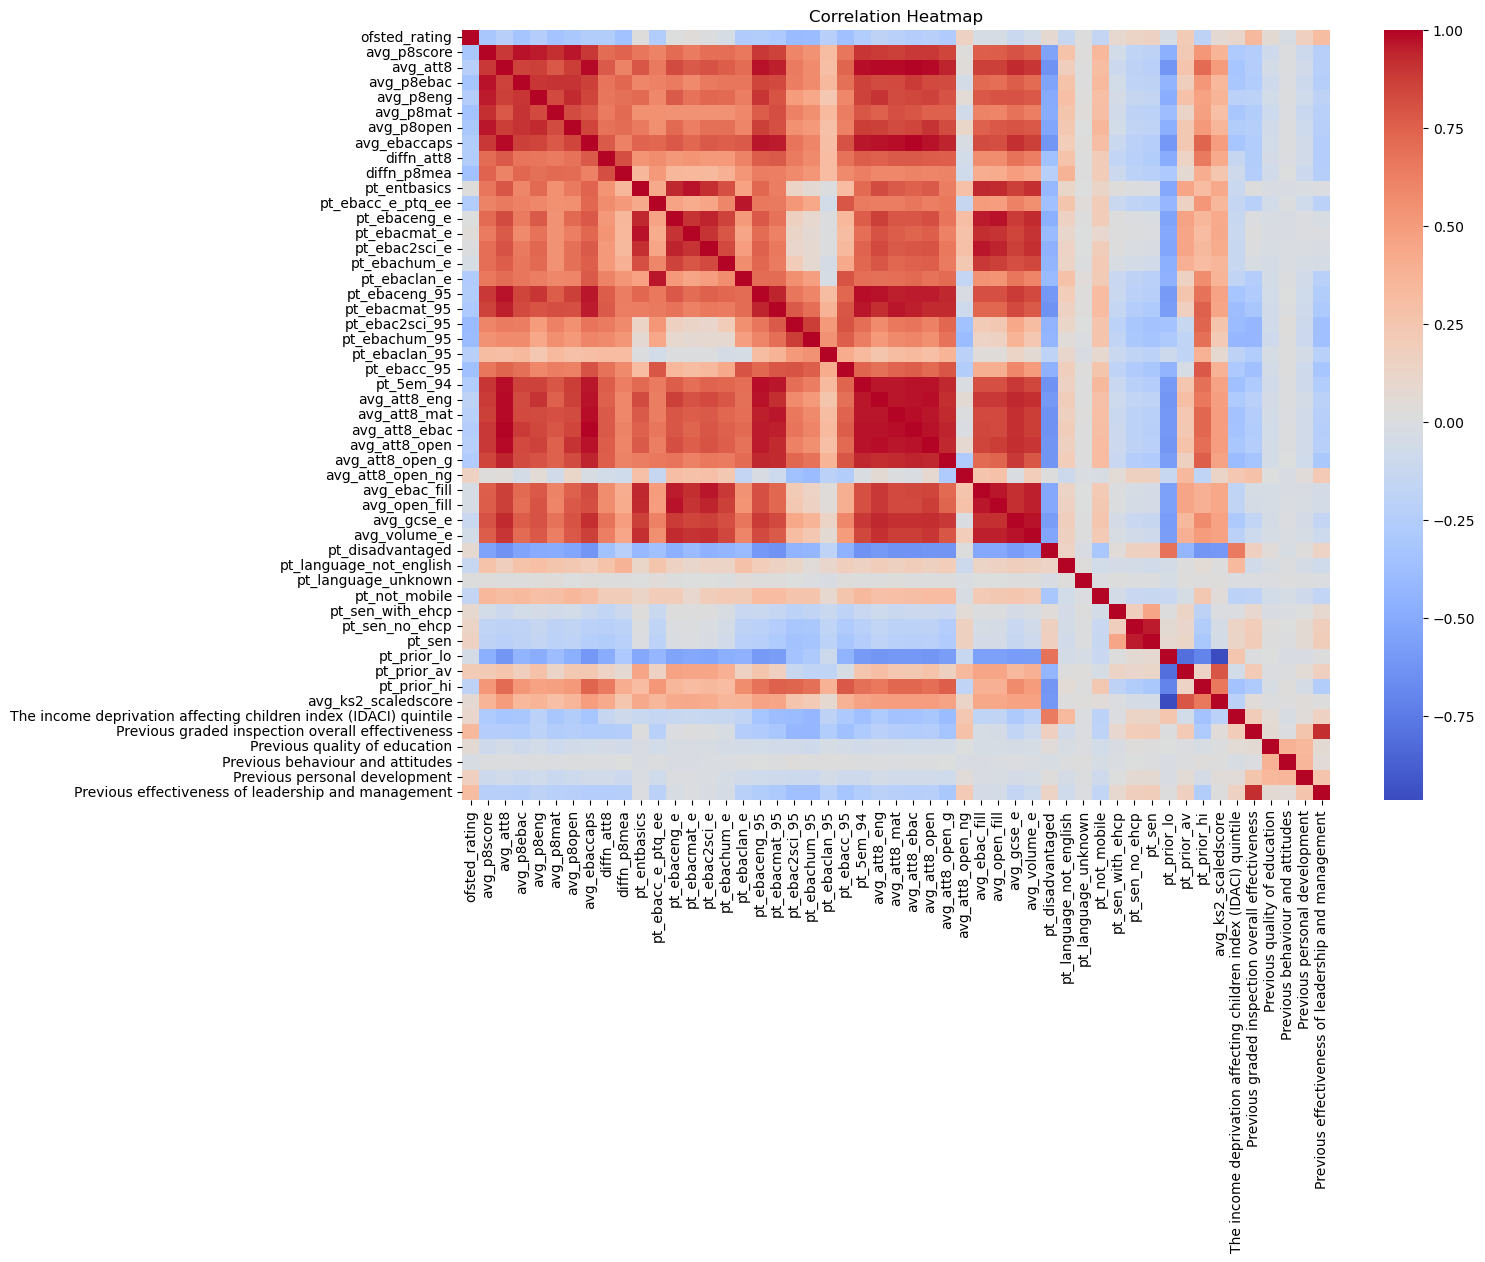

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_final.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


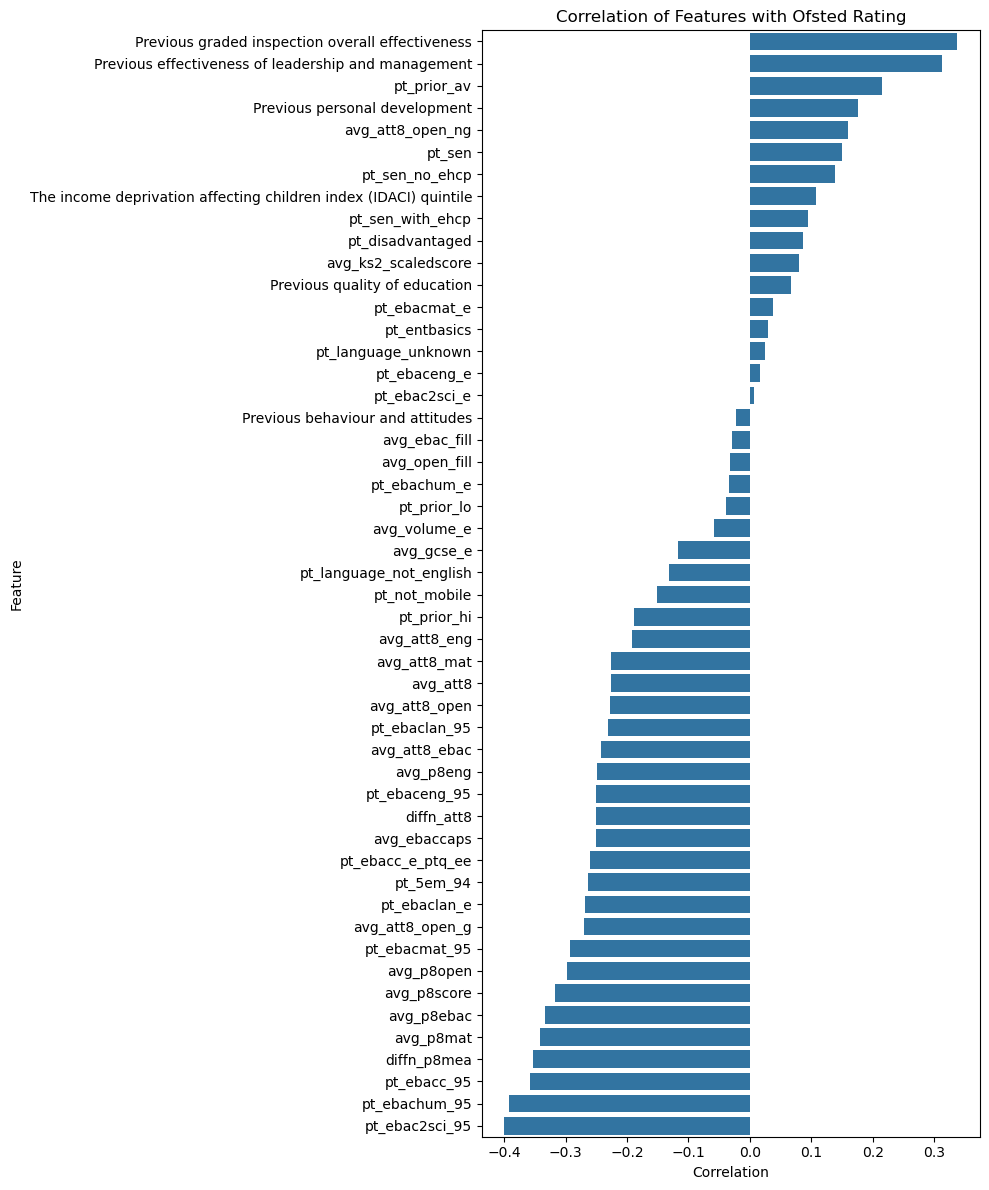

In [99]:
# Correlation with the target only
target_corr = df_final.corr(numeric_only=True)['ofsted_rating'].drop('ofsted_rating').sort_values(ascending=False)

# Visualise
plt.figure(figsize=(10, 12))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Correlation of Features with Ofsted Rating")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [102]:
# Calculate correlation with the target
corr_with_target = df_final.corr(numeric_only=True)['ofsted_rating'].abs()

# Set threshold
threshold = 0.05

# Identify weakly correlated features (excluding the target itself)
low_corr_features = corr_with_target[corr_with_target < threshold].index.tolist()

# Drop them from the dataframe
df_final = df_final.drop(columns=low_corr_features)

print(f"Dropped {len(low_corr_features)} features with correlation below {threshold}.")
print("Dropped features:", low_corr_features)


Dropped 10 features with correlation below 0.05.
Dropped features: ['pt_entbasics', 'pt_ebaceng_e', 'pt_ebacmat_e', 'pt_ebac2sci_e', 'pt_ebachum_e', 'avg_ebac_fill', 'avg_open_fill', 'pt_language_unknown', 'pt_prior_lo', 'Previous behaviour and attitudes']


In [104]:
import numpy as np


# Compute the absolute correlation matrix
corr_matrix = df_final.corr(numeric_only=True).abs()

# Create upper triangle mask
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features to drop
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop the features
df_final = df_final.drop(columns=to_drop)

# Print summary
print(f"Dropped {len(to_drop)} highly correlated features (|corr| > 0.85).")
print("Dropped features:", to_drop)



Dropped 20 highly correlated features (|corr| > 0.85).
Dropped features: ['avg_att8', 'avg_p8ebac', 'avg_p8eng', 'avg_p8mat', 'avg_p8open', 'avg_ebaccaps', 'pt_ebaclan_e', 'pt_ebaceng_95', 'pt_ebacmat_95', 'pt_ebachum_95', 'pt_5em_94', 'avg_att8_eng', 'avg_att8_mat', 'avg_att8_ebac', 'avg_att8_open', 'avg_att8_open_g', 'avg_gcse_e', 'avg_volume_e', 'pt_sen', 'Previous effectiveness of leadership and management']


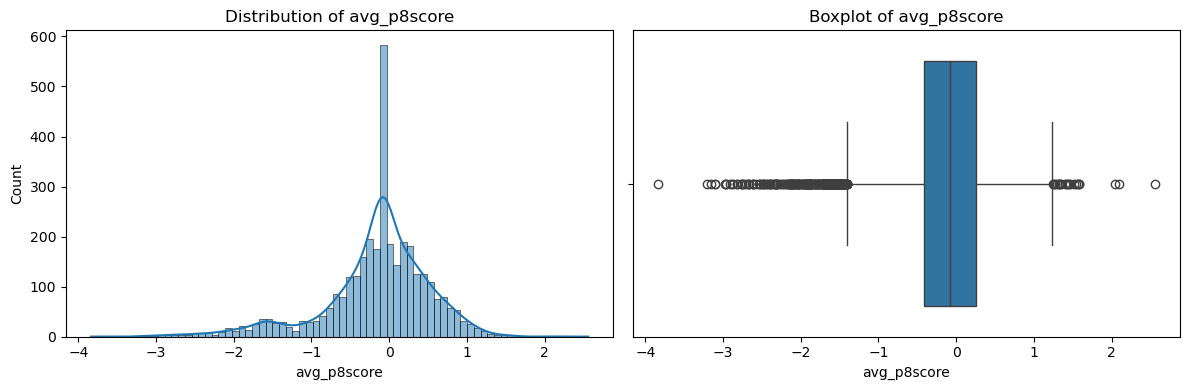

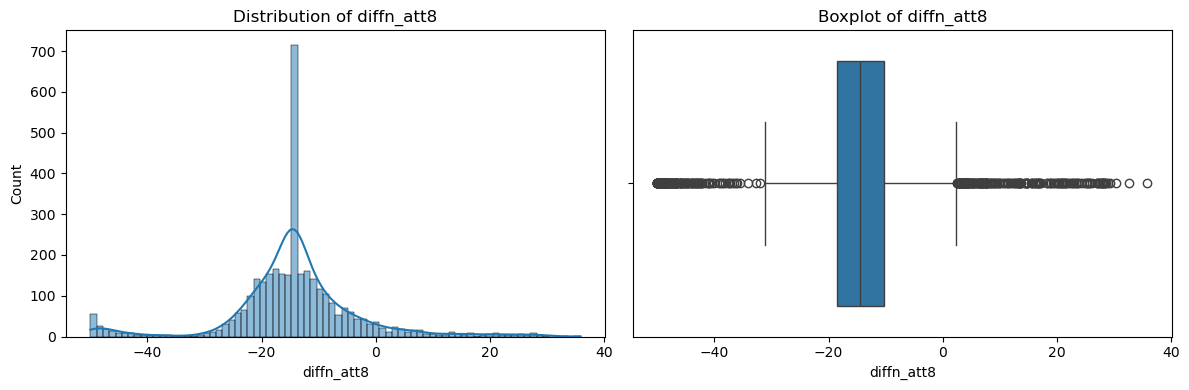

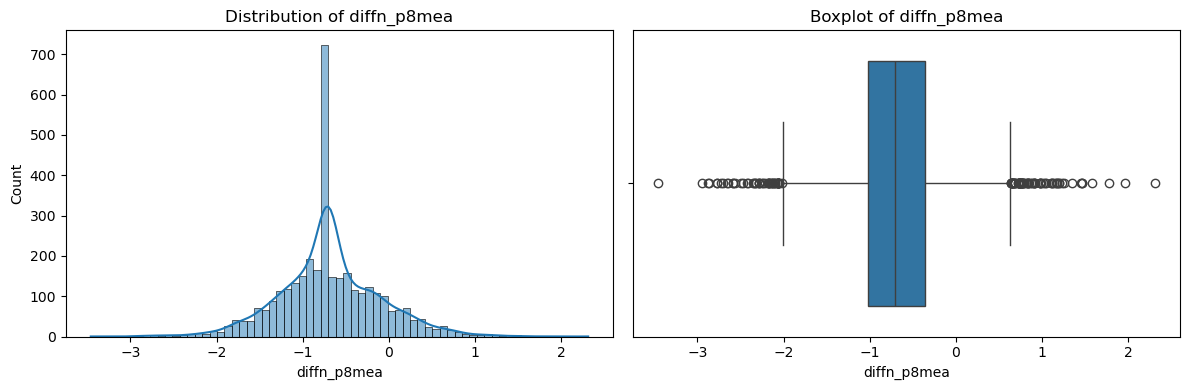

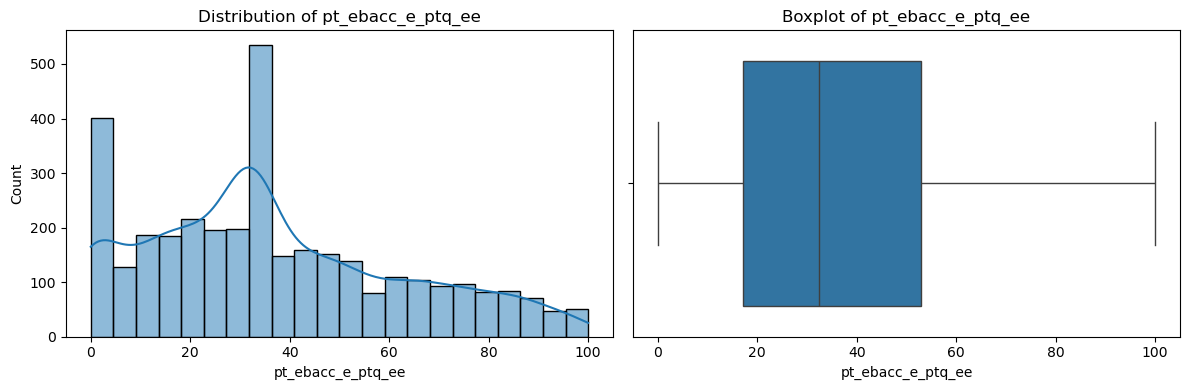

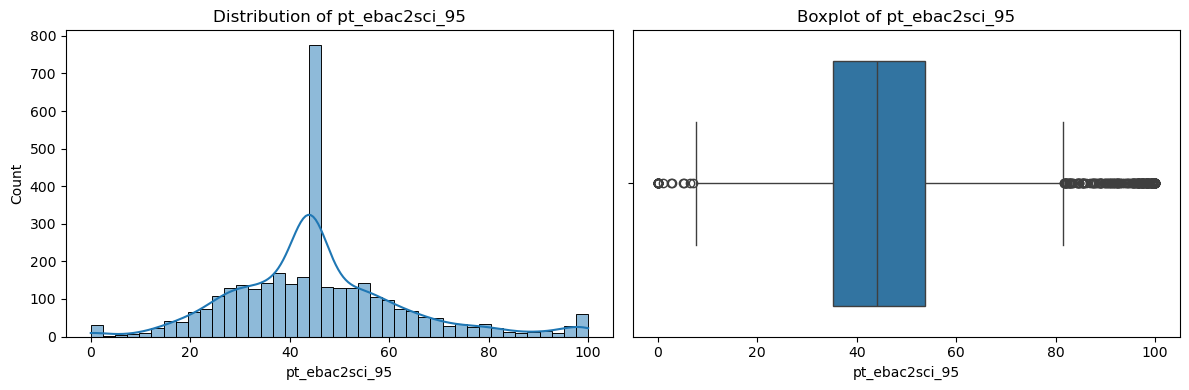

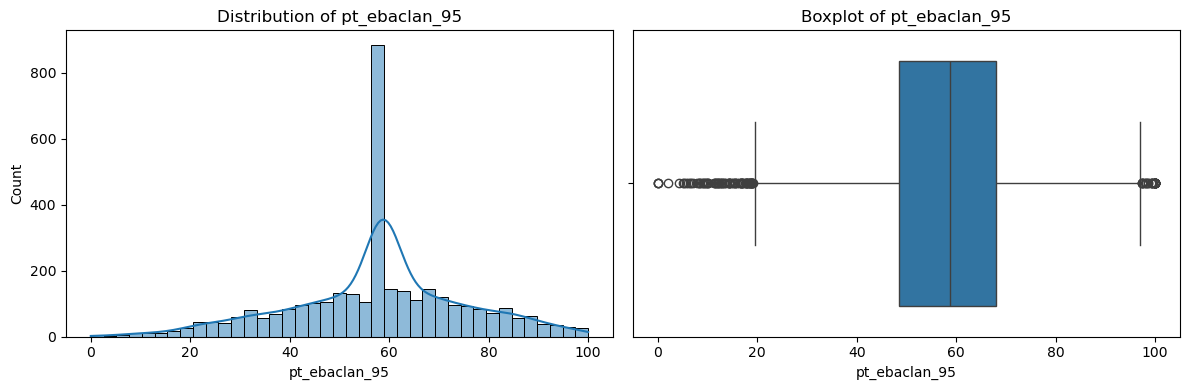

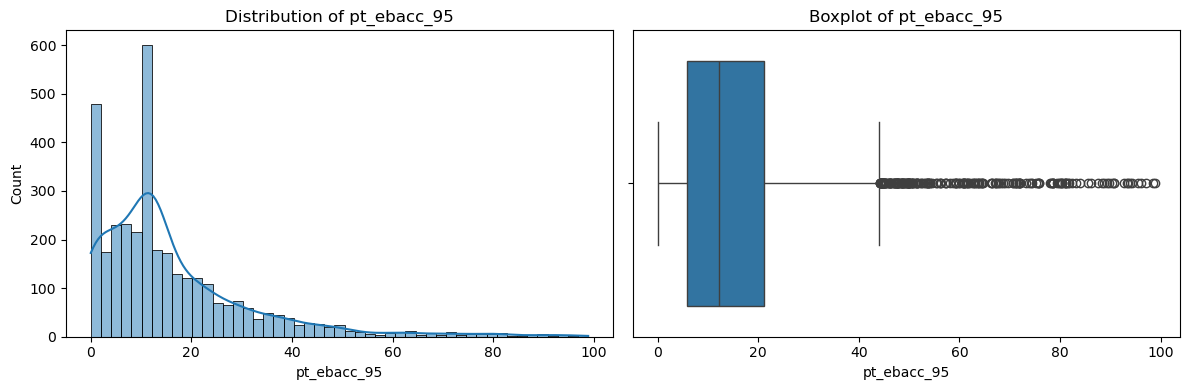

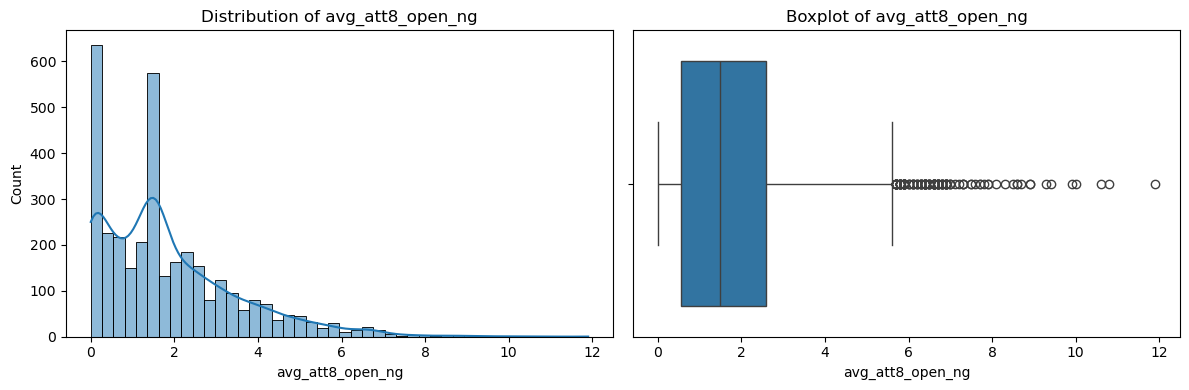

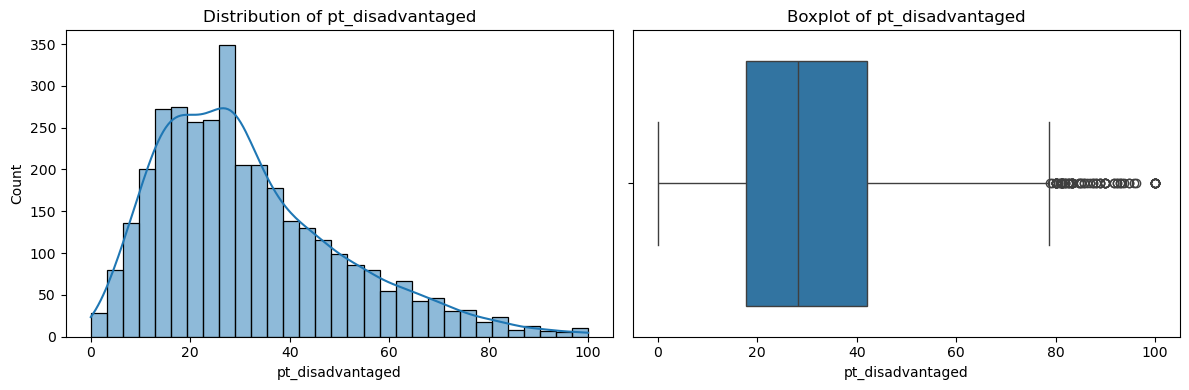

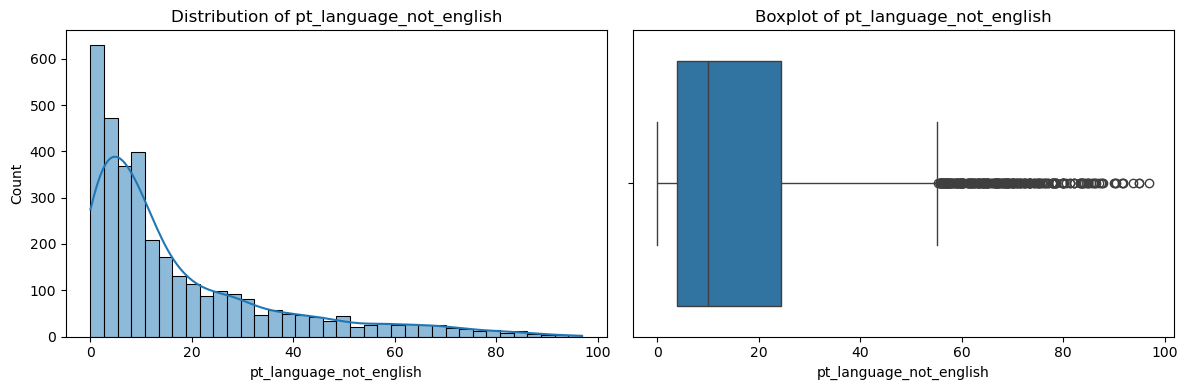

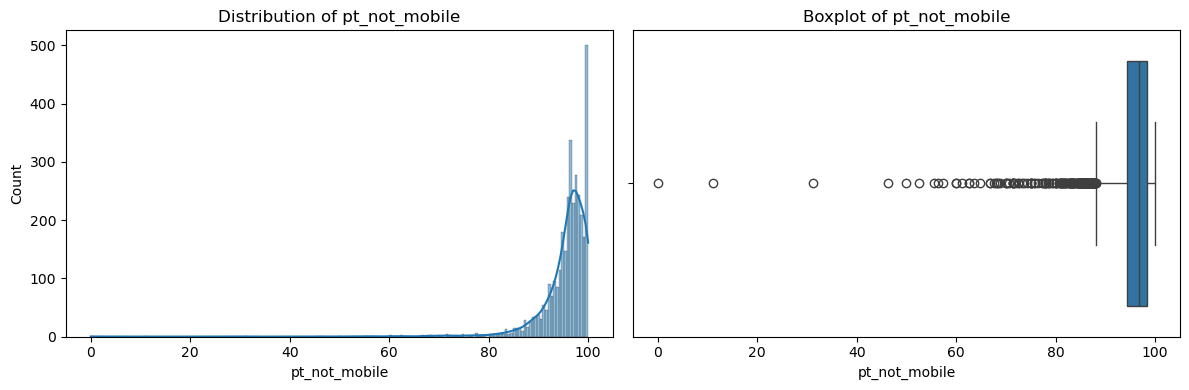

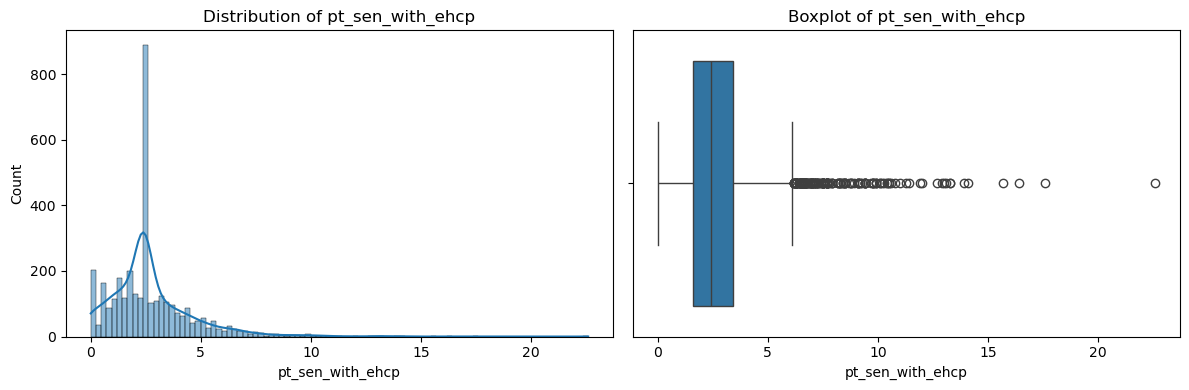

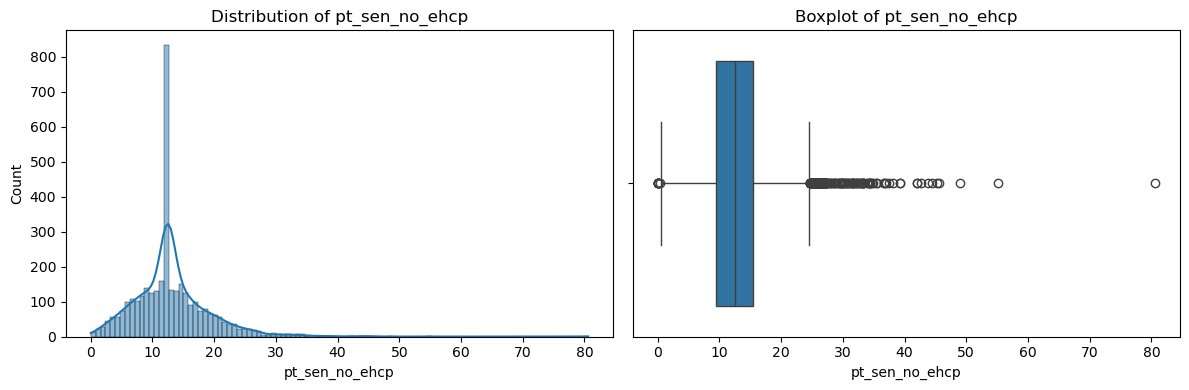

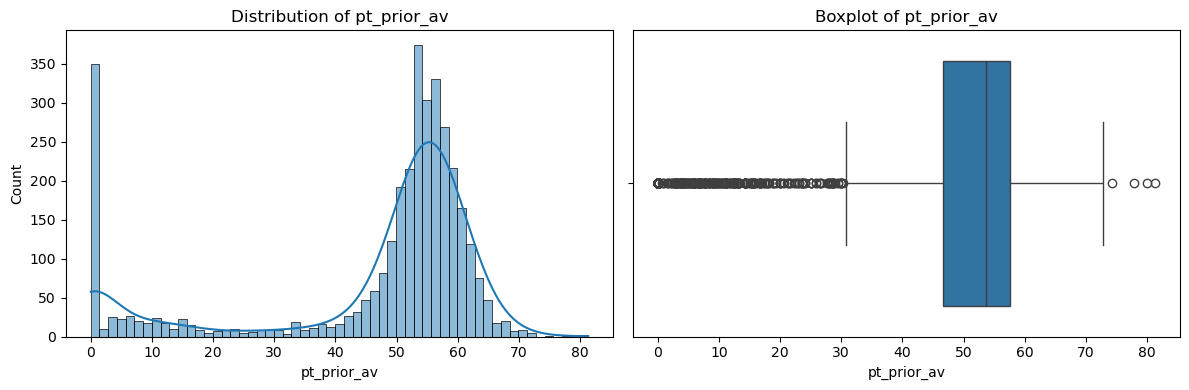

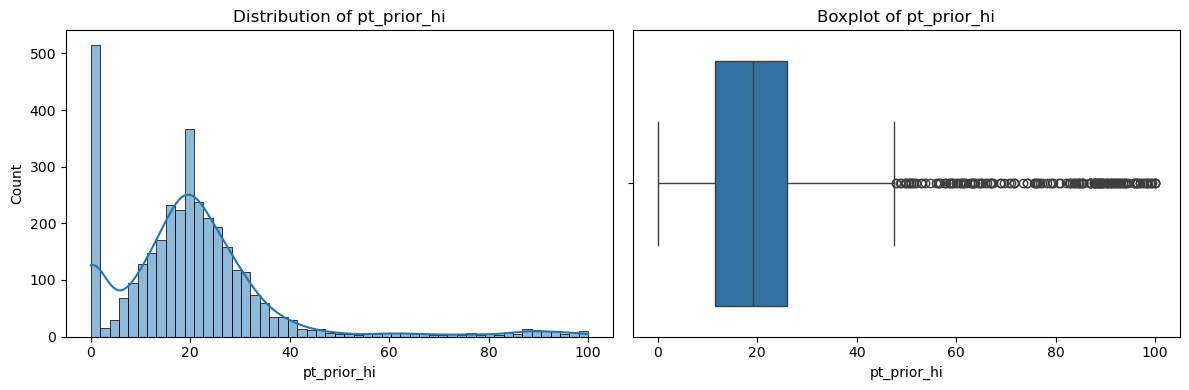

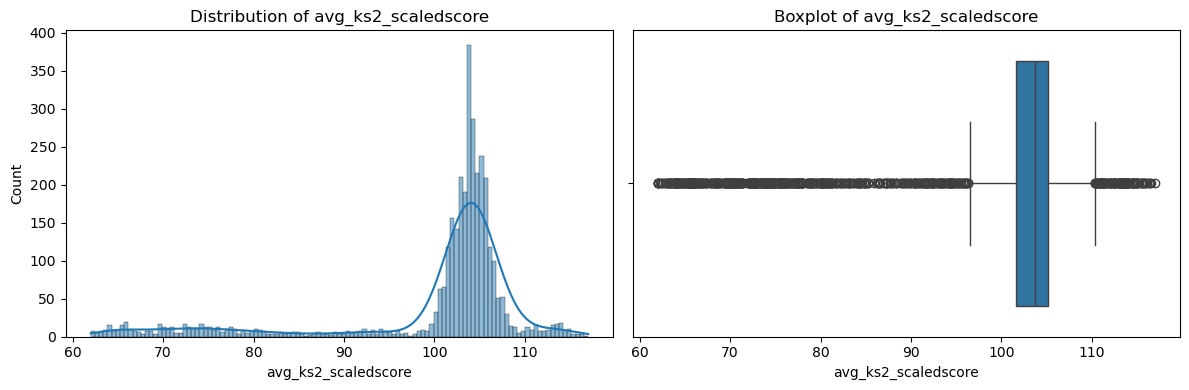

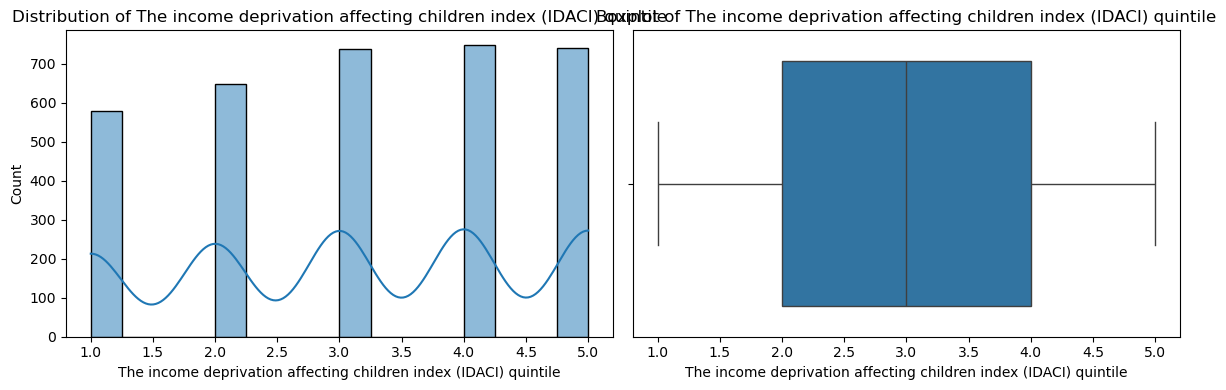

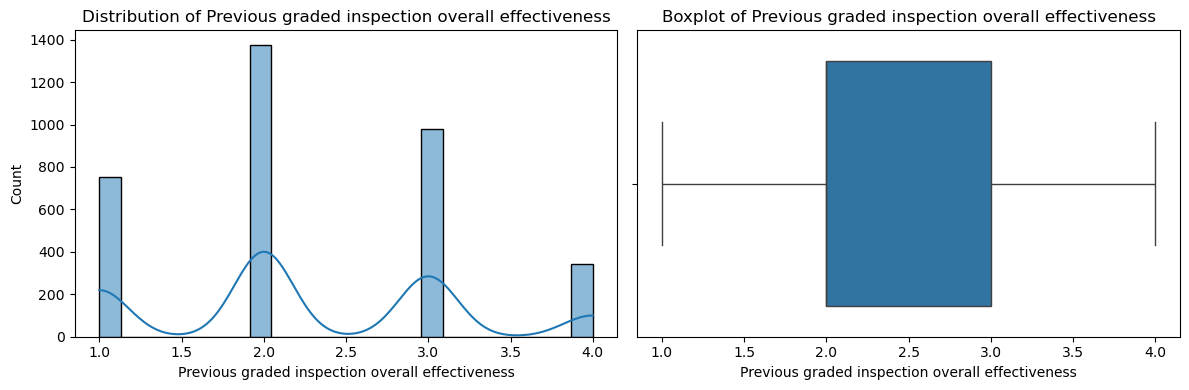

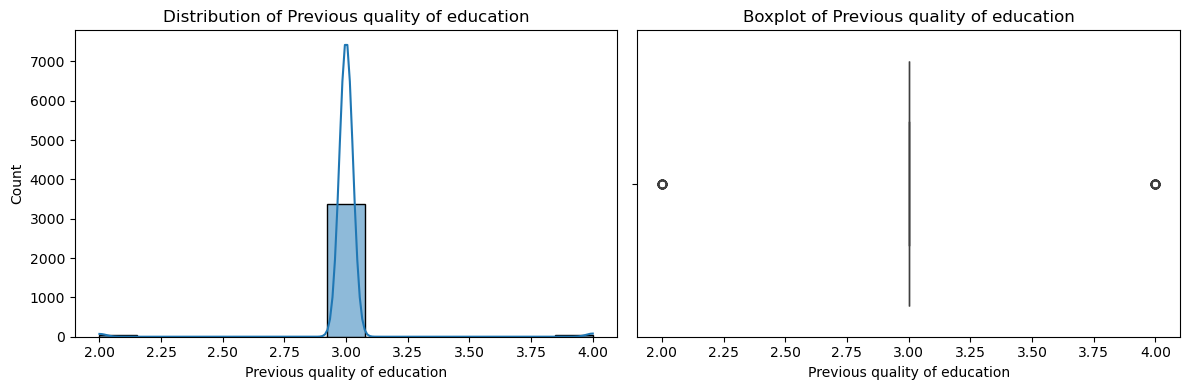

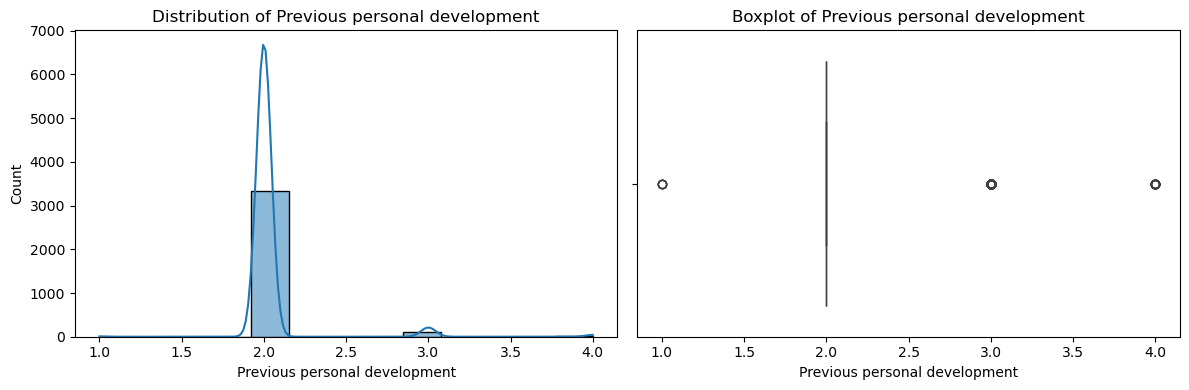

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_final.select_dtypes(include=['float64', 'int64']).columns.drop('ofsted_rating')

# Plot histograms and boxplots side by side
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(df_final[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=df_final[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()



In [109]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Log-transform skewed columns
skewed_cols = [
    'pt_ebacc_95', 'pt_ebacc_e_ptq_ee', 'pt_disadvantaged', 'pt_language_not_english',
    'avg_att8_open_ng', 'pt_not_mobile', 'pt_sen_with_ehcp', 'pt_sen_no_ehcp'
]
for col in skewed_cols:
    df_final[col] = np.log1p(df_final[col])

# Standardise all numeric columns (except target)
num_cols = df_final.select_dtypes(include=['float64', 'int64']).columns.drop('ofsted_rating')
scaler = StandardScaler()
df_final[num_cols] = scaler.fit_transform(df_final[num_cols])


In [111]:
# Identify categorical columns (object dtype, excluding the target)
cat_cols = df_final.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col != 'ofsted_rating']

# One-hot encode categorical columns
df_final = pd.get_dummies(df_final, columns=cat_cols, drop_first=True)


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split features and target
X = df_final.drop('ofsted_rating', axis=1)
y = df_final['ofsted_rating']

# Train/test split (stratified to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



# Diagnostic: check splits and class distribution
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Class distribution in train:\n", y_train.value_counts(normalize=True).round(3))
print("Class distribution in test:\n", y_test.value_counts(normalize=True).round(3))

# Fit multinomial logistic regression (with class weights for imbalance)
model = LogisticRegression(
    multi_class='multinomial',
    class_weight='balanced',
    max_iter=1000,
    solver='lbfgs'
)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training set shape: (2760, 41)
Test set shape: (691, 41)
Class distribution in train:
 ofsted_rating
2.0    0.698
1.0    0.177
3.0    0.107
4.0    0.018
Name: proportion, dtype: float64
Class distribution in test:
 ofsted_rating
2.0    0.699
1.0    0.177
3.0    0.107
4.0    0.017
Name: proportion, dtype: float64
Accuracy: 0.5253256150506512

Classification Report:
               precision    recall  f1-score   support

         1.0       0.44      0.80      0.57       122
         2.0       0.86      0.47      0.61       483
         3.0       0.26      0.41      0.32        74
         4.0       0.08      0.58      0.14        12

    accuracy                           0.53       691
   macro avg       0.41      0.57      0.41       691
weighted avg       0.71      0.53      0.56       691


Confusion Matrix:
 [[ 98  18   1   5]
 [118 228  84  53]
 [  5  18  30  21]
 [  3   2   0   7]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [115]:
# See most important features overall 

feature_names = X_train.columns
mean_abs_coefs = pd.Series(abs(model.coef_).mean(axis=0), index=feature_names)

print("Top 15 features by mean absolute coefficient across classes:")
print(mean_abs_coefs.sort_values(ascending=False).head(15))


Top 15 features by mean absolute coefficient across classes:
School type at time of latest graded inspection_Non-Maintained Special School    1.353214
School type at time of latest graded inspection_Free School Special              1.326383
School type at time of latest graded inspection_Academy Special Converter        1.194276
School type at time of latest graded inspection_University Technical College     1.171243
pt_ebacc_95                                                                      1.057787
School type at time of latest graded inspection_Community Special School         1.039543
pt_ebacc_e_ptq_ee                                                                1.028539
School type at time of latest graded inspection_Foundation Special School        0.980913
School type at time of latest graded inspection_Academy Special Sponsor Led      0.806875
School type at time of latest graded inspection_Studio School                    0.727117
Previous safeguarding is effective?_Yes

In [117]:
# Select top N features (e.g., top 15 by mean absolute coefficient)
N = 15
top_features = mean_abs_coefs.sort_values(ascending=False).head(N).index.tolist()

# Prepare data with only these features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain logistic regression
model_top = LogisticRegression(
    multi_class='multinomial',
    class_weight='balanced',
    max_iter=1000,
    solver='lbfgs'
)
model_top.fit(X_train_top, y_train)

# Evaluate
y_pred_top = model_top.predict(X_test_top)
print("Accuracy (top features):", accuracy_score(y_test, y_pred_top))
print(classification_report(y_test, y_pred_top))


Accuracy (top features): 0.46599131693198265
              precision    recall  f1-score   support

         1.0       0.40      0.75      0.53       122
         2.0       0.82      0.41      0.55       483
         3.0       0.19      0.35      0.25        74
         4.0       0.06      0.42      0.10        12

    accuracy                           0.47       691
   macro avg       0.37      0.48      0.36       691
weighted avg       0.66      0.47      0.50       691



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
